In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PROJECT_PATH = '/home/swei20/PIML_v1/'
import sys
sys.path.insert(0, PROJECT_PATH)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from PIML.gateway.loaderIF.baseloaderIF import SpecGridLoaderIF


In [120]:
GRID_PATH="/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid"
DATA_PATH=os.path.join(GRID_PATH, "bosz_5000_RHB.h5")

In [121]:
loader = SpecGridLoaderIF()

In [123]:
loader.set_path(DATA_PATH)

In [124]:
SpecGrid = loader.load()

In [125]:
SpecGrid.flux.shape

(2880, 15404)

In [126]:
from PIML.crust.operation.specoperation import SplitSpecOperation

In [127]:
sop = SplitSpecOperation("RedM")

In [128]:
sop.perform_on_Spec(SpecGrid)

In [130]:
SpecGrid.flux.shape

(2880, 2204)

In [131]:
fluxH_mid = SpecGrid.flux[1377]

In [133]:
waveH = SpecGrid.wave

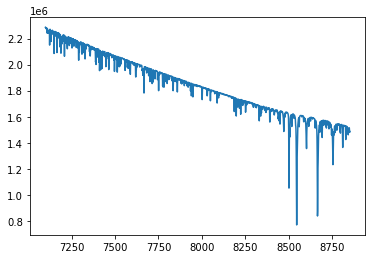

In [135]:
plt.plot(waveH, fluxH_mid)

In [136]:
def get_var(flux, sky):
    #--------------------------------------------
    # Get the total variance
    # BETA is the scaling for the sky
    # VREAD is the variance of the white noise
    # This variance is still scaled with an additional
    # factor when we simuate an observation.
    #--------------------------------------------
    assert flux.shape[-1] == sky.shape[0]
    BETA  = 10.0
    VREAD = 16000
    return  flux + BETA*sky + VREAD

In [228]:
def get_noise(sigma):
    np.random.rand(922)
    return np.random.normal(0, sigma, np.shape(sigma))

In [142]:
BETA  = 10.0
VREAD = 16000
varH= get_var(fluxH_mid, Ob.skyH)

In [143]:
varH.shape

(2204,)

In [251]:
sigmaH = np.sqrt(varH)

In [284]:
nl=200

In [257]:
obsfluxH  = get_noise(nl*sigmaH) + fluxH_mid

In [144]:
var= get_var(flux_mid, Ob.sky)

In [246]:
sigma = var**0.5

In [249]:
sigma10 = np.sqrt(var/10)

In [258]:
obsflux = get_noise(nl*sigma) + flux_mid

In [285]:
obsflux10 = get_noise(nl*sigma10) + flux_mid

In [265]:
np.mean(obsfluxH/nl/sigmaH)

13.522334681494602

In [266]:
np.mean(obsflux/nl/sigma)

13.545734993567585

In [286]:
np.mean(obsflux10/nl/sigma10)

21.35756350439086

In [269]:
np.sqrt(10)*13

41.10960958218893

In [287]:
logsigma = nl*sigma10 / flux_mid

In [288]:
obslogflux10 = get_noise(logsigma) + np.log(flux_mid)

In [289]:
obslogexpflux10=np.exp(obslogflux10)

In [291]:
a =np.mean(obslogexpflux10 / nl/sigma10).round(2)

In [292]:
a

21.4

In [ ]:
np.mean(obslogexpflux10

In [242]:
(var**0.5)[:10]

array([1516.10405571, 1508.37047702, 1506.16448051, 1503.13387406,
       1500.35378318, 1508.73174673, 1496.33600943, 1500.20714979,
       1502.47512037, 1487.22273784])

In [243]:
0.1**0.5

0.31622776601683794

In [272]:
var10**0.5 * np.sqrt(10)

array([1516.10405571, 1508.37047702, 1506.16448051, 1503.13387406,
       1500.35378318, 1508.73174673, 1496.33600943, 1500.20714979,
       1502.47512037, 1487.22273784, 1500.12381963, 1490.09445519,
       1484.0389103 , 1486.34164306, 1493.78763027, 1480.50042021,
       1487.64629852, 1476.40153938, 1491.89529383, 1483.95145031,
       1486.00193189, 1481.17235025, 1482.8524984 , 1483.81321776,
       1478.87852881, 1476.09672814, 1460.97631828, 1474.01217204,
       1474.8632558 , 1462.86762513, 1471.08180159, 1463.3221043 ,
       1469.25938513, 1473.03947154, 1468.58489919, 1458.80828875,
       1464.71212361, 1464.22733348, 1462.20439456, 1449.13479056,
       1448.06133266, 1453.68209577, 1440.25751361, 1437.33495223,
       1436.76779549, 1451.97854101, 1452.67397906, 1438.4963252 ,
       1445.35175294, 1444.93657676, 1443.17087496, 1446.52068832,
       1442.35635605, 1442.75490308, 1433.54169181, 1438.11399527,
       1428.87786775, 1436.28427159, 1429.52516673, 1433.04986

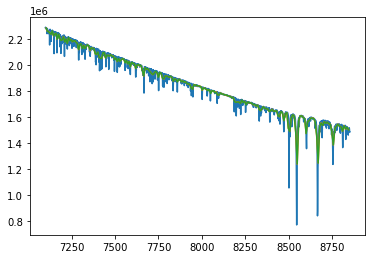

In [234]:
plt.plot(waveH, obsfluxH)
plt.plot(Ob.wave, obsflux)
plt.plot(Ob.wave, obsflux10)

In [147]:
varH

array([2303101.46860769, 2302401.46860769, 2297501.46840085, ...,
       1516804.55016593, 1495704.68691036, 1502604.73654769])

In [149]:
var10 = var / 10

In [150]:
def get_snr(obsfluxs, sigma, noise_level=1):
    return np.mean(np.divide(obsfluxs, noise_level*sigma))

In [ ]:
flux = np.random.rand

In [152]:
np.mean(flux_mid / var**0.5)

1352.1900956649608

In [158]:
from PIML.crust.operation.specgridoperation import TuneSpecGridOperation

In [159]:
top = TuneSpecGridOperation("Alex", 20)

In [173]:
skyL=top.perform(Ob.skyH)

In [160]:
top.perform_on_Spec(SpecGrid)

In [163]:
fluxL_mid = SpecGrid.flux[1377]

In [ ]:
waveL = SpecGrid.flux[1377]

In [175]:
varL= get_var(fluxL_mid, skyL)

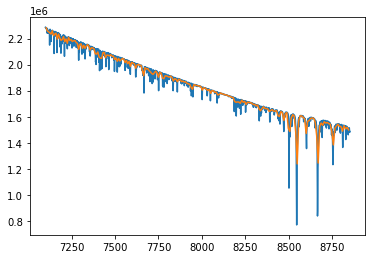

In [155]:
plt.plot(waveH, fluxH_mid)
plt.plot(Ob.wave, flux_mid)

In [ ]:
varL = 

In [165]:
obsfluxH = 

array([2303101.46860769, 2302401.46860769, 2297501.46840085, ...,
       1516804.55016593, 1495704.68691036, 1502604.73654769])

In [200]:
waveL =SpecGrid.wave

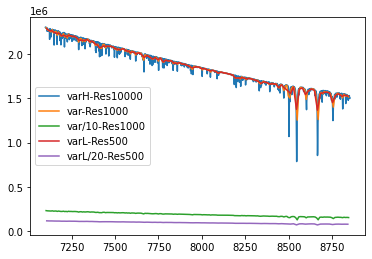

In [180]:
plt.plot(waveH, varH, label="varH-Res10000")
plt.plot(Ob.wave, var, label="var-Res1000")
plt.plot(Ob.wave, var10, label="var/10-Res1000")
plt.plot(SpecGrid.wave, varL, label="varL-Res500")
plt.plot(SpecGrid.wave, varL/20, label="varL/20-Res500")


plt.legend()

In [181]:
from scipy import interpolate

In [185]:
Ob.wave

array([7103.93535, 7111.04302, 7118.15752, 7125.27919, 7132.40811,
       7139.54389, 7146.687  , 7153.83731, 7160.99483, 7168.15929,
       7175.33091, 7182.50982, 7189.69599, 7196.88931, 7204.08979,
       7211.29745, 7218.51226, 7225.73457, 7232.96373, 7240.20049,
       7247.4442 , 7254.69511, 7261.95346, 7269.21914, 7276.4919 ,
       7283.77212, 7291.05935, 7298.35411, 7305.65621, 7312.96543,
       7320.28208, 7327.60596, 7334.9372 , 7342.27588, 7349.62183,
       7356.97509, 7364.3357 , 7371.70382, 7379.07911, 7386.46192,
       7393.852  , 7401.24956, 7408.65444, 7416.06675, 7423.48657,
       7430.91382, 7438.34849, 7445.79043, 7453.23998, 7460.69695,
       7468.16133, 7475.63325, 7483.1125 , 7490.59941, 7498.09378,
       7505.59557, 7513.10493, 7520.62169, 7528.14614, 7535.67812,
       7543.21735, 7550.76451, 7558.31905, 7565.88106, 7573.45084,
       7581.02797, 7588.61283, 7596.20528, 7603.80515, 7611.41284,
       7619.02807, 7626.65071, 7634.28116, 7641.91939, 7649.56

In [189]:
waveH[8]

7105.7109

In [220]:
f1 = interpolate.interp1d(Ob.wave, var)
v1 = f1(waveH[20:-20])

In [221]:
f2 = interpolate.interp1d(waveL, varL)
v2 = f2(waveH[20:-20])

In [222]:
v3 = f2(Ob.wave[10:-10])

In [196]:
f11 = interpolate.interp1d(Ob.wave, var10)
v11 = f11(waveH[8:-8])

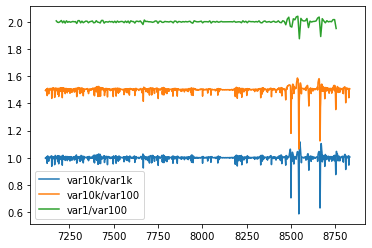

In [223]:
plt.plot(waveH[20:-20], varH[20:-20]/v1, label="var10k/var1k")
plt.plot(waveH[20:-20], varH[20:-20]/v2 + 0.5, label="var10k/var100")

# plt.plot(Ob.wave[10:-10], , label="var-Res1000")
plt.plot(Ob.wave[10:-10], var[10:-10] / v3 + 1 , label="var1/var100")


plt.legend()

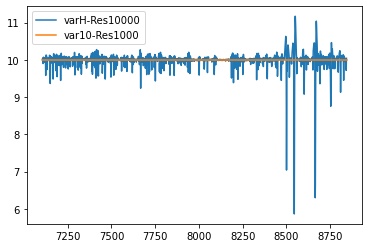

In [198]:
plt.plot(waveH[8:-8], varH[8:-8]/v11, label="varH-Res10000")
plt.plot(Ob.wave, 10* var10/var10, label="var10-Res1000")

plt.legend()

In [ ]:
var

In [178]:
varL

array([2286876.50184043, 2263971.44285651, 2263666.47915964,
       2244821.47270083, 2234631.47962838, 2235376.47980389,
       2205791.48359184, 2211641.48929066, 2196426.50748418,
       2213931.73732071, 2201036.63636238, 2200276.59860633,
       2182971.62690366, 2153581.84295609, 2157601.65598166,
       2152696.6239411 , 2164284.21274897, 2142431.61472823,
       2144671.64457968, 2119016.66633289, 2105036.62934942,
       2070136.73521359, 2086271.69085832, 2089766.68352939,
       2088441.70029575, 2087582.13803994, 2080966.78410271,
       2061606.82277913, 2052302.23488172, 2048587.05664499,
       2060911.85735018, 2039847.12803426, 2031697.53364722,
       2018206.9840782 , 2024551.8215952 , 2000821.82065969,
       2013921.80435047, 1991836.95794547, 1961486.96345937,
       1983826.85020722, 1965956.94695184, 1944355.85655557,
       1960057.37190324, 1935606.93788254, 1953726.95417161,
       1910542.02712257, 1929557.04226603, 1921927.55536923,
       1922682.82134527,

# TESTING

In [68]:
from test.testbase import DataInitializer

In [69]:
D = DataInitializer()

In [70]:
D.SPEC_GRID_PARAMS

{'object': {'DATA_PATH': '/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid/bosz_5000_RHB.h5'},
 'data': {'SKY_PATH': '/home/swei20/PIML_v1/test/testdata/testspecgriddata/wavesky.npy',
  'Sky': <PIML.crust.data.specdata.basesky.StellarSky at 0x7fdec51b4d30>},
 'op': {'box_name': 'R', 'arm': 'RedM', 'step': 10, 'wave_rng': [7100, 8850]},
 'model': {'Resolution': 'Alex', 'Interp': 'RBF'}}

In [71]:
from PIML.gateway.processIF.specgridprocessIF.basespecgridprocessIF import StellarSpecGridProcessIF

In [74]:
SP = StellarSpecGridProcessIF()
SP.interact(D.SPEC_GRID_PARAMS)
Ob = SP.Object

In [81]:
Ob.coordx_rng

array([4., 5., 3., 5., 3.])

In [76]:
Ob.builder.store(".", "data")

In [270]:
Ob.Obs.cal_sigma

<bound method LowResObs.cal_sigma of <PIML.crust.model.obs.stellarobs.LowResObs object at 0x7fdec54b3130>>

In [80]:
Ob.base_interp

In [59]:
Ob.map_snr( [10,20,30])

array([156.77460792,  78.38744601,  47.03249602])

In [8]:
from PIML.crust.process.baseprocess import StellarSpecProcess


In [94]:
np.random.seed(922)
SSP = StellarSpecProcess()
SSP.set_process(D.OP_PARAM, D.OP_MODEL, D.OP_DATA)
SSP.start(SpecGrid)

In [95]:
SpecGrid.map_snr( [10,20,30])

array([156.77548358,  78.38766493,  47.03258358])

In [40]:
flux = SP.Object.flux

In [11]:
from PIML.surface.posteval.evalstellarprocess import EvalStellarSpecGridProcess

In [16]:
# e = EvalStellarProcess(SP=SP)
e = EvalStellarSpecGridProcess(PARAMS=D.SPEC_GRID_PARAMS)

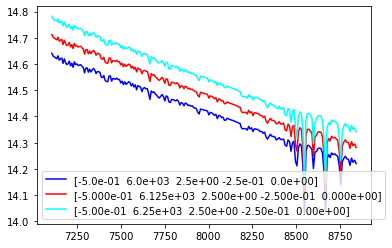

In [17]:
e.eval_interpolator()

In [97]:
Ob.coord[D.midx]

array([-5.0e-01,  6.0e+03,  2.5e+00, -2.5e-01,  0.0e+00])

In [101]:
flux_mid = Ob.flux[D.midx]

In [103]:
sigma = Ob.Obs.cal_sigma(flux_mid)

In [104]:
sigma_log = sigma / flux_mid

In [106]:
logflux_mid = np.log(flux_mid)

In [ ]:
# np.random.sigma_log

In [108]:
# np.random.logflux_mid

[autoreload of PIML.gateway.processIF.specgridprocessIF.basespecgridprocessIF failed: Traceback (most recent call last):
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/dat

In [109]:
# sigma_log

In [117]:
flux_mid.shape

(220,)

In [119]:
Ob.__dict__

{'coord': array([[-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01, -2.50e-01],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  0.00e+00],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  2.50e-01],
        ...,
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  0.00e+00],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  2.50e-01],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  5.00e-01]]),
 'coord_idx': array([[ 6,  8,  4,  0,  0],
        [ 6,  8,  4,  0,  1],
        [ 6,  8,  4,  0,  2],
        ...,
        [10, 13,  7,  5,  1],
        [10, 13,  7,  5,  2],
        [10, 13,  7,  5,  3]]),
 'PhyShort': ['M', 'T', 'G', 'C', 'A'],
 'dfcoord':         M       T    G     C     A
 0    -1.0  5500.0  2.0 -0.75 -0.25
 1    -1.0  5500.0  2.0 -0.75  0.00
 2    -1.0  5500.0  2.0 -0.75  0.25
 3    -1.0  5500.0  2.0 -0.75  0.50
 4    -1.0  5500.0  2.0 -0.50 -0.25
 ...   ...     ...  ...   ...   ...
 2875  0.0  6750.0  3.5  0.25  0.50
 2876  0.0  6750.0  3.5  0.50 -0.25
 28

In [118]:
Ob.flux.shape

(2880, 220)

In [ ]:
sigma = Ob.Obs.cal_sigma(flux_mid)

In [110]:
fn = Ob.Obs.cal_sigma

In [271]:
import pickle
with open('/home/swei20/PIML_v1/test/testdata/testprepnndata/obs.pickle', 'wb') as f:
    # Write object `ip` to file
    pickle.dump(fn, f, pickle.HIGHEST_PROTOCOL)

In [112]:
with open('obs.pickle', 'rb') as f:
    # Read out object `ip` from file
    fnn = pickle.load(f)

In [114]:
fnn(flux_mid)

array([479.43419859, 476.98862627, 476.29102893, 475.33266702,
       474.45352509, 477.10286979, 473.18299347, 474.40715554,
       475.12435081, 470.30112396, 474.38080423, 471.20924072,
       469.29430929, 470.02249732, 472.37712522, 468.17534047,
       470.4350656 , 466.87916054, 471.7787159 , 469.26665201,
       469.91507122, 468.3878234 , 468.9191329 , 469.22293904,
       467.66245338, 466.78277077, 462.00127733, 466.12357625,
       466.39271256, 462.59936107, 465.19691174, 462.74308001,
       464.62061306, 465.81598134, 464.40732188, 461.3156862 ,
       463.18264271, 463.02933861, 462.38962915, 458.25665748,
       457.91720028, 459.69464164, 455.44941602, 454.52522096,
       454.34587025, 459.15593033, 459.37584715, 454.89247934,
       457.06035594, 456.9290657 , 456.37070177, 457.43000577,
       456.11312827, 456.23915991, 453.32568669, 454.771576  ,
       451.85085603, 454.19296657, 452.05554994, 453.17015689,
       454.24352982, 453.70164987, 450.74291929, 452.54

In [115]:
sigma

array([479.43419859, 476.98862627, 476.29102893, 475.33266702,
       474.45352509, 477.10286979, 473.18299347, 474.40715554,
       475.12435081, 470.30112396, 474.38080423, 471.20924072,
       469.29430929, 470.02249732, 472.37712522, 468.17534047,
       470.4350656 , 466.87916054, 471.7787159 , 469.26665201,
       469.91507122, 468.3878234 , 468.9191329 , 469.22293904,
       467.66245338, 466.78277077, 462.00127733, 466.12357625,
       466.39271256, 462.59936107, 465.19691174, 462.74308001,
       464.62061306, 465.81598134, 464.40732188, 461.3156862 ,
       463.18264271, 463.02933861, 462.38962915, 458.25665748,
       457.91720028, 459.69464164, 455.44941602, 454.52522096,
       454.34587025, 459.15593033, 459.37584715, 454.89247934,
       457.06035594, 456.9290657 , 456.37070177, 457.43000577,
       456.11312827, 456.23915991, 453.32568669, 454.771576  ,
       451.85085603, 454.19296657, 452.05554994, 453.17015689,
       454.24352982, 453.70164987, 450.74291929, 452.54

In [113]:
Ob = e.SpecGrid

In [22]:
Ob.interpolator(Ob.coord[D.midx], scale=1)

array([14.64081256, 14.63051247, 14.62756459, 14.62350759, 14.61977863,
       14.63099483, 14.61437719, 14.61958175, 14.62262461, 14.60207067,
       14.61946987, 14.60595685, 14.59775319, 14.60087678, 14.61094353,
       14.59294374, 14.60264432, 14.58735801, 14.60838994, 14.59763427,
       14.60041616, 14.59385789, 14.59614192, 14.5974467 , 14.5907353 ,
       14.58694198, 14.56619525, 14.58409447, 14.5852576 , 14.56880225,
       14.58008498, 14.56942823, 14.57758661, 14.58276285, 14.57666212,
       14.56320274, 14.57134142, 14.57067433, 14.56788845, 14.54979488,
       14.54830144, 14.55610891, 14.53741039, 14.5333162 , 14.53252074,
       14.55374582, 14.55471083, 14.5349442 , 14.54452669, 14.54394766,
       14.54148304, 14.54615581, 14.54034534, 14.54090225, 14.52798967,
       14.53440833, 14.52142094, 14.5318419 , 14.52233379, 14.52729793,
       14.5320666 , 14.52966063, 14.51647213, 14.52453109, 14.51239076,
       14.52054184, 14.50168851, 14.51776613, 14.51425206, 14.51

In [23]:
interp_coordx = np.copy(Ob.coordx[D.midx])

In [24]:
interp_coordx[1] += 0.5 

In [25]:
interp_coordx

array([2. , 2.5, 1. , 2. , 1. ])

In [35]:
import pickle
with open('/home/swei20/PIML_v1/test/testdata/testprepnndata/interp.pickle', 'wb') as f:
    # Write object `ip` to file
    pickle.dump(Ob.interpolator, f, pickle.HIGHEST_PROTOCOL)

[autoreload of test.testbase failed: Traceback (most recent call last):
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importli

AttributeError: Can't pickle local object 'RBFInterpSpecGridModel.apply_on_SpecGrid.<locals>.interpolator'

In [28]:
from scipy.interpolate import RBFInterpolator


In [29]:
interp = RBFInterpolator(Ob.coordx, Ob.logflux, kernel="gaussian", epsilon=0.5)


In [36]:
import pickle
with open('/home/swei20/PIML_v1/test/testdata/testprepnndata/interp.pickle', 'wb') as f:
    # Write object `ip` to file
    pickle.dump(interp, f, pickle.HIGHEST_PROTOCOL)

In [77]:
with open('data.pickle', 'rb') as f:
    # Read out object `ip` from file
    ip = pickle.load(f)

In [78]:
aaa=np.array([interp_coordx])

In [79]:
ip(aaa)

array([[14.71221238, 14.70254542, 14.69836966, 14.69541416, 14.69225459,
        14.70216577, 14.68643852, 14.69115949, 14.69386743, 14.67431404,
        14.690642  , 14.67827186, 14.67000655, 14.67318688, 14.68189303,
        14.66516853, 14.67366377, 14.65893685, 14.67858126, 14.66854098,
        14.67062753, 14.66455261, 14.66690356, 14.66737625, 14.66093744,
        14.65749576, 14.6379182 , 14.65450016, 14.65527085, 14.63903774,
        14.64966506, 14.63978099, 14.64715553, 14.65174276, 14.64604444,
        14.63336259, 14.64068023, 14.63977277, 14.63694825, 14.62016487,
        14.61848898, 14.62579247, 14.60732836, 14.60370547, 14.60257223,
        14.62221837, 14.6230401 , 14.6043839 , 14.61285454, 14.61228638,
        14.60953997, 14.61414655, 14.60831272, 14.60897422, 14.5964719 ,
        14.60253035, 14.58973756, 14.59928204, 14.59084901, 14.59504295,
        14.59919677, 14.59675585, 14.58428782, 14.59153711, 14.58033932,
        14.58746764, 14.56989277, 14.58453409, 14.5

In [34]:
Ob.interpolator(interp_coordx, scale=0)

array([14.71221238, 14.70254542, 14.69836966, 14.69541416, 14.69225459,
       14.70216577, 14.68643852, 14.69115949, 14.69386743, 14.67431404,
       14.690642  , 14.67827186, 14.67000655, 14.67318688, 14.68189303,
       14.66516853, 14.67366377, 14.65893685, 14.67858126, 14.66854098,
       14.67062753, 14.66455261, 14.66690356, 14.66737625, 14.66093744,
       14.65749576, 14.6379182 , 14.65450016, 14.65527085, 14.63903774,
       14.64966506, 14.63978099, 14.64715553, 14.65174276, 14.64604444,
       14.63336259, 14.64068023, 14.63977277, 14.63694825, 14.62016487,
       14.61848898, 14.62579247, 14.60732836, 14.60370547, 14.60257223,
       14.62221837, 14.6230401 , 14.6043839 , 14.61285454, 14.61228638,
       14.60953997, 14.61414655, 14.60831272, 14.60897422, 14.5964719 ,
       14.60253035, 14.58973756, 14.59928204, 14.59084901, 14.59504295,
       14.59919677, 14.59675585, 14.58428782, 14.59153711, 14.58033932,
       14.58746764, 14.56989277, 14.58453409, 14.58105407, 14.57

In [44]:
Ob.__dict__

{'coord': array([[-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01, -2.50e-01],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  0.00e+00],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  2.50e-01],
        ...,
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  0.00e+00],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  2.50e-01],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  5.00e-01]]),
 'coord_idx': array([[ 6,  8,  4,  0,  0],
        [ 6,  8,  4,  0,  1],
        [ 6,  8,  4,  0,  2],
        ...,
        [10, 13,  7,  5,  1],
        [10, 13,  7,  5,  2],
        [10, 13,  7,  5,  3]]),
 'PhyShort': ['M', 'T', 'G', 'C', 'A'],
 'dfcoord':         M       T    G     C     A
 0    -1.0  5500.0  2.0 -0.75 -0.25
 1    -1.0  5500.0  2.0 -0.75  0.00
 2    -1.0  5500.0  2.0 -0.75  0.25
 3    -1.0  5500.0  2.0 -0.75  0.50
 4    -1.0  5500.0  2.0 -0.50 -0.25
 ...   ...     ...  ...   ...   ...
 2875  0.0  6750.0  3.5  0.25  0.50
 2876  0.0  6750.0  3.5  0.50 -0.25
 28

In [ ]:
 [4., 5., 3., 5., 3.]

In [120]:
from scipy.stats.qmc import Halton


In [121]:
sampler = Halton(d=5, scramble=False)
sample = sampler.random(n=10)

In [122]:
sampler


In [132]:
np.set_printoptions(precision=3, suppress=False)


In [130]:
rng = [0,1,30,50,1000]

In [133]:
sample * rng

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.333e-01, 6.000e+00, 7.143e+00, 9.091e+01],
       [0.000e+00, 6.667e-01, 1.200e+01, 1.429e+01, 1.818e+02],
       [0.000e+00, 1.111e-01, 1.800e+01, 2.143e+01, 2.727e+02],
       [0.000e+00, 4.444e-01, 2.400e+01, 2.857e+01, 3.636e+02],
       [0.000e+00, 7.778e-01, 1.200e+00, 3.571e+01, 4.545e+02],
       [0.000e+00, 2.222e-01, 7.200e+00, 4.286e+01, 5.455e+02],
       [0.000e+00, 5.556e-01, 1.320e+01, 1.020e+00, 6.364e+02],
       [0.000e+00, 8.889e-01, 1.920e+01, 8.163e+00, 7.273e+02],
       [0.000e+00, 3.704e-02, 2.520e+01, 1.531e+01, 8.182e+02]])

In [136]:
np.random.seed(922)
np.random.uniform(0, 1, size=(10, 5))

array([[0.36 , 0.295, 0.899, 0.521, 0.027],
       [0.181, 0.308, 0.437, 0.049, 0.08 ],
       [0.233, 0.199, 0.006, 0.933, 0.802],
       [0.458, 0.887, 0.454, 0.613, 0.974],
       [0.346, 0.014, 0.359, 0.944, 0.213],
       [0.314, 0.545, 0.028, 0.336, 0.492],
       [0.247, 0.493, 0.907, 0.183, 0.163],
       [0.186, 0.478, 0.64 , 0.545, 0.88 ],
       [0.035, 0.351, 0.865, 0.252, 0.156],
       [0.048, 0.896, 0.146, 0.452, 0.192]])

In [138]:

np.random.seed(922)
np.random.uniform(0, rng, size=(1, 5))

array([[ 0.   ,  0.295, 26.981, 26.032, 26.798]])

In [142]:
a=Halton(d=5, scramble=False).random(n=10)



In [46]:
with open("/home/swei20/PIML_v1/test/testdata/testmethoddata/interp.pickel", 'rb') as f:
    # Read out object `ip` from file
    ip = pickle.load(f)